In [4]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo
from IPython.display import Image

def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

# Intro to over-representation analysis (ORA)
### Written by Reese Richardson for use in Biol Sci 378, Winter 2022, Northwestern University (rakr@u.northwestern.edu)

Welcome back to Python! First, let's import the libraries that we'll need.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

# 3.1 The hypergeometric distribution

Is our class enriched for biology majors? In other words, does our class have a higher proportion of biology majors in it than the Northwestern student population at-large?

Well, duh. Of course it does! This is a biology course, and that's exactly what we would expect. For the purpose of demonstration, however, let's assume that we have know nothing about our course: let's imagine that we have no information on the syllabus, no information on the course code, and no information on the instructor. Could we determine the subject matter of the class if the only information we had was the major of each student?

We'll start by modeling our class. Let's imagine that our class has 40 students and 12 of them are biology majors, whereas Northwestern has 8,000 students and 1,250 of them are biology majors.

In [ ]:
class_size = 40
class_bio = 12
nu_size = 8_000
nu_bio = 1_250

class_array = np.array(['bio']*class_bio + ['non_bio']*(class_size-class_bio))
nu_array = np.array(['bio']*nu_bio + ['non_bio']*(nu_size-nu_bio))
print('Our class: ')
print(class_array)
print(str(class_bio) + ' bio majors out of ' + str(class_size) + ' ({:.1f}%)'.format(100*class_bio/class_size))
print('Northwestern population: ')
print(nu_array)
print(str(nu_bio) + ' bio majors out of ' + str(nu_size) + ' ({:.1f}%)'.format(100*nu_bio/nu_size))

Well, that settles it, doesn't it? Whereas 30.0% of students in our class are biology majors, only 15.6% of students at Northwestern are biology majors. Therefore, our class is enriched for biology majors.

**But how sure of that are we?** What if our class wound up with that number of biology majors by random chance alone, and, in reality, our class has nothing to do with biology? In other words, **if we were to select a random group of Northwestern students the same size as our class, how many biology majors would be in that group, and how does it compare to the number of biology majors in our class?**

Let's try it!

In [ ]:
np.random.choice(nu_array, # grab a random set from nu_array
                 size=class_size, # of a size the same size as our class (40)
                 replace=False) # without replacement.

In [ ]:
np.random.seed(378)
random_class = np.random.choice(nu_array, # grab a random set from nu_array
                                size=class_size, # of a size the same size as our class (40)
                                replace=False) # without replacement.
number_of_bio_majors = np.sum(random_class == 'bio')
print('number of bio majors in random sample: ' + str(number_of_bio_majors))

For a class of size 40 selected randomly from the Northwestern population at-large, we get 5 biology majors. However, if we were to select again (this time with a different random seed), we would probably get a different number of biology majors.

In [ ]:
np.random.seed(379)
random_class = np.random.choice(nu_array, # grab a random set from nu_array
                                size=class_size, # of a size the same size as our class (40)
                                replace=False) # without replacement.
number_of_bio_majors = np.sum(random_class == 'bio')
print('number of bio majors in random sample: ' + str(number_of_bio_majors))

Indeed, we do! Let's construct a random classes 1,000 times and observe the distribution of how many biology majors appear each time.

In [ ]:
np.random.seed(378)
num_bio_array = []
n_iter = 1_000
for n in range(n_iter):
    random_class = np.random.choice(nu_array, # grab a random set from nu_array
                                    size=class_size, # of a size the same size as our class (40)
                                    replace=False) # without replacement.
    number_of_bio_majors = np.sum(random_class == 'bio')
    num_bio_array.append(number_of_bio_majors)
num_bio_array = np.array(num_bio_array)

In [ ]:
fig = plt.figure(figsize=(8,5))
bins = np.arange(-0.5,class_size,1)
sns.distplot(num_bio_array, bins=bins, kde=False, norm_hist=True) # plot our distribution

ax = plt.gca()
ax.set_xticks(np.arange(0,class_size,1))
ax.set_xlim([-0.5,19.5])
ax.tick_params(labelsize=14) # set the fontsize of the tick labels
ax.set_xlabel('number of bio majors', fontsize=16)
ax.set_ylabel('frequency', fontsize=16)

As you can see from the distribution of these 10,000 random classes, it is very likely that our class were to have around 6 biology majors by random chance alone, and very unlikely that our class would have 12 or more biology majors by random chance alone. We can calculate this probability from this empirical distribution:

In [ ]:
np.sum(num_bio_array >= 12)/len(num_bio_array)

From our empirical distribution, we find that that the probability of getting 12 or more biology majors in your class by random chance alone is 0.018 (this value might be called your *empirical p value*).

In fact, the distribution of number of bio majors we expect in a randomly-select class of our size will follow the **hypergeometric distribution**. The hypergeometric distribution takes the form:

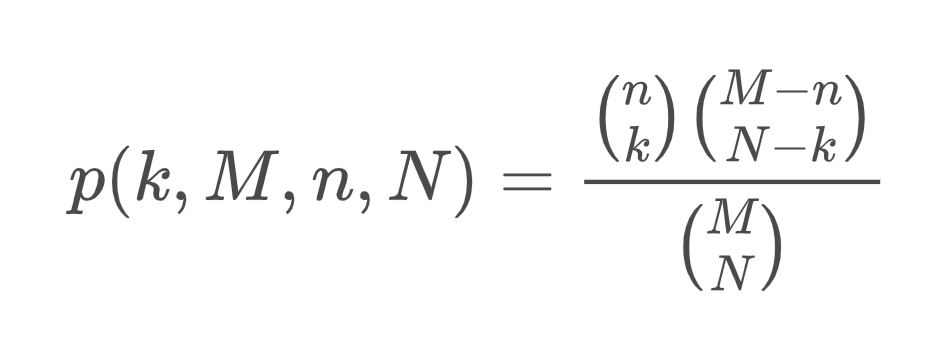

In [2]:
Image(filename='hypergeom_pmf.jpg')

Where $p(k, M, n, N)$ represents the probability of finding $k$ events in a sample of size $N$ from a total population of size $M$ where there are $n$ events in total. In our case, an 'event' is one student with a biology major. Please note that the $k, M, n, N$ nomenclature is not agreed upon among statisticians--this is just the nomenclature that [scipy.stats.hypergeom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html) uses.

Let's plot the probability mass function of our hypergeometric distribution over our empirical distribution of values.

In [ ]:
fig = plt.figure(figsize=(8,5))
bins = np.arange(-0.5,class_size,1)
sns.distplot(num_bio_array, bins=bins, kde=False, norm_hist=True)
k_array = np.arange(0, 20, 1)
plt.plot(k_array, scipy.stats.hypergeom.pmf(k=k_array, # probability of finding k bio majors
                                            N=class_size, # in a class of size N
                                            n=nu_bio, # when there are n bio majors at NU
                                            M=nu_size)) # and NU has M students to select from

ax = plt.gca()
ax.set_xticks(np.arange(0,class_size,1))
ax.set_xlim([-0.5,19.5])
ax.tick_params(labelsize=14) # set the fontsize of the tick labels
ax.set_xlabel('number of bio majors', fontsize=16)
ax.set_ylabel('frequency', fontsize=16)

We see that our empirical distribution pretty cleanly matches the expected hypergeometric distribution (with some noise). As we add more samples, we expect our empirirical distribution to converge to the theoretical hypergeometric.

To calculate the probability that we wind up with 12 or more biology majors after randomly drawing a class of size 40 from the NU population at large, we can sum up $p(k, M, n, N)$ for every $k >= 12$. We'll stop at $k = 40$, since there is zero probability of more than 40 biology majors in a class of size 40.

In [ ]:
np.sum(scipy.stats.hypergeom.pmf(k=np.arange(12,class_size+1,1), N=class_size, n=nu_bio, M=nu_size))

This is known as a **one-tailed hypergeometric test** (one-tailed since we are only concerned about the probability that we obtain a $k$ value from our null distribution that is *greater than or equal to* our observed $k$. This is equivalent to measuring the survival function of our hypergeometric distribution at $k-1$.

In [ ]:
scipy.stats.hypergeom.sf(k=12-1, N=class_size, n=nu_bio, M=nu_size)

This kind of test is also known as a [**one-tailed Fisher's exact test**](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

In [ ]:
odds_ratio, p = scipy.stats.fisher_exact([[class_size - class_bio, class_bio], 
                                          [nu_size-(class_size-class_bio)-nu_bio, nu_bio-class_bio]], alternative='less')
print('Odds ratio: ' + str(odds_ratio))
print('p-value: ' + str(p))

We'll call the hypergeometric survival function when we want to perform this kind of test from now on (mostly because it involves the least amount of typing). We find a p-value of ~0.016, suggesting (at a significance threshold of 0.05), that our class is indeed significantly enriched for biology majors! In other words, biology majors are over-represented in our class.

# 3.2 Gene ontology over-representation analysis (with a single gene ontology)

Determining if a specific major is over-represented in our class is analogous to determining if a specific set of genes that you've selected for one reason or another is enriched for another set of genes. This process is often refered to as over-representation analysis (ORA). We'll explore an example below. 

You might hear sets of genes referred to as "gene ontologies". There are a handful of organizations that have curated many different gene ontologies based on evidence covered over years. These include...

* [Gene Ontology Resource (GO) from the GO Consortium](http://geneontology.org/)
* [Molecular Signatured Database (MSigDB) from the Broad Institute](http://www.gsea-msigdb.org/gsea/msigdb/)
* [Kyoto Encyclopedia of Genes and Genomes (KEGG) from the Kaneshisa Lab of Kyoto University](https://www.kegg.jp/)
* [WikiPathways, sort of like a Wikipedia for pathways](https://www.wikipathways.org/index.php/WikiPathways)

...in genomics, you'll probably find yourself making use of all of the above. Further, you'll probably find lots of overlap between different resources. Some examples of gene ontologies are:

* [gene products that participate in the mitotic spindle midzone (GO)](http://amigo.geneontology.org/amigo/term/GO:1990023)
* [genes probably targeted by the transcription factor ADNP (MSigDB)](http://www.gsea-msigdb.org/gsea/msigdb/cards/ADNP_TARGET_GENES.html)
* [genes involved in Influenza A infection (KEGG)](https://www.kegg.jp/entry/ko05164)
* [the IL-6 signaling pathway (WikiPathways)](https://www.wikipathways.org/wpi/PathwayWidget.php?id=WP364&label[]=HCK&label[]=STAT1&label[]=IL6&colors=steelblue)

For our example, let's turn back to our [esophageal adenocarcinoma dataset (E-MTAB-4054)](https://www.ebi.ac.uk/gxa/experiments/E-MTAB-4054/Results).

In [ ]:
de_df = pd.read_csv('E-MTAB-4054-query-results.tsv', sep='\t', header=3)
de_df

In the cell above, we've stored a dataset containing differential expression results from our EAC experiment in the DataFrame `de_df`. Each row represents a gene, each column that ends with `.foldChange` represents a log2(fold change) between two different conditions and each column that ends with `.pValue` represents the Benjamini-Hochberg-corrected p-value (AKA the q-value) for that comparison. I would correct the nomenclature to make the column names less confusing and easier to work with, but this is the exact format we get from EBI-GXA and I don't want you to get lost when you go searching for your own data for your projects.

Let's make a volcano plot showing fold-change vs negative log q-value for every gene when we compare esophageal adenocarcinoma (EAC) to non-dysplastic Barrett's esophagus (NDBE)!

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(de_df["'esophageal adenocarcinoma' vs 'Barrett’s esophagus; non-dysplastic' .foldChange"], 
            -np.log10(de_df["'esophageal adenocarcinoma' vs 'Barrett’s esophagus; non-dysplastic'.pValue"]), 
            alpha=0.3, s=2)
ax = plt.gca()
ax.tick_params(labelsize=16) # set the fontsize of the tick labels
ax.set_xlabel(r'$log_2$(fold change), EAC vs NDBE', fontsize=16)
ax.set_ylabel(r'-$log_{10}$(q-value)', fontsize=16)
ax.set_ylim([0,25])
ax.axhline(-np.log10(0.05), color=sns.color_palette()[3], linestyle='dashed') # Significance threshold alpha = 0.05

You heard a rumor that EAC, like many other carcinomas, leads to an increase in circulating [interleukin-17 (IL-17)-producing Th (Th17) cells](https://pubmed.ncbi.nlm.nih.gov/22082565/). This gives you an idea--if we look at the set of genes that are upregulated in EAC compared to all pre-malignant conditions (NORM, NDBE, and LGD), **will we see an enrichment for genes that are involved in IL-17 signaling?**

Lucky for us, a gene set containing genes involved in IL-17 signaling has already been curated by the folks at KEGG! KEGG named this gene set [hsa04657: IL-17 signaling pathway - Homo sapiens (human)](https://www.genome.jp/dbget-bin/www_bget?pathway+hsa04657), and it has 94 members. Let's take a look at those members. I've copied the info from the KEGG entry into the file `kegg_hsa04657.txt`. I read this file in the line below such that we just wind up with an array of gene symbols, stored in the variable `pathway`.

In [ ]:
pathway = pd.read_csv('kegg_hsa04657.txt', header=None, sep='\t')[1].apply(lambda x: x.split(';')[0]).astype(str).values
pathway

Now let's isolate our genes of interest (the genes that upregulated in EAC). I'll refer to this set of genes as our input set and the KEGG pathway as our gene ontology.

In [ ]:
# select genes that are upregulated
fc_truth_series_0 = de_df["'esophageal adenocarcinoma' vs 'Barrett’s esophagus; non-dysplastic' .foldChange"] > 0
# at a significance threshold of 0.05
q_val_truth_series_0 = de_df["'esophageal adenocarcinoma' vs 'Barrett’s esophagus; non-dysplastic'.pValue"] < 0.05

# select genes that are upregulated
fc_truth_series_1 = de_df["'esophageal adenocarcinoma' vs 'Barrett’s esophagus; low-grade dysplasia' .foldChange"] > 0
# at a significance threshold of 0.05
q_val_truth_series_1 = de_df["'esophageal adenocarcinoma' vs 'Barrett’s esophagus; low-grade dysplasia'.pValue"] < 0.05

# select genes that are upregulated
fc_truth_series_2 = de_df["'esophageal adenocarcinoma' vs 'normal' .foldChange"] > 0
# at a significance threshold of 0.05
q_val_truth_series_2 = de_df["'esophageal adenocarcinoma' vs 'normal'.pValue"] < 0.05

# collecting just genes that are upregulated in EAC vs every pre-malignant condition (LGD, NDBE, NORM)
de_df_slice = de_df[fc_truth_series_0 & q_val_truth_series_0
                    & fc_truth_series_1 & q_val_truth_series_1
                    & fc_truth_series_2 & q_val_truth_series_2]
de_df_slice

We find that 1,970 genes are upregulated in EAC versus every pre-malignant condition studied. We can check the overlap between our two gene sets by seeing if each gene name in our input set (`de_df_slice['Gene Name']`) appears in the variable `pathway`.

In [ ]:
np.sum(de_df_slice['Gene Name'].isin(pathway))

Our input set and our gene ontology have 15 members in common! However, is this enriched compared to the gene population as a whole? To represent this gene population as a whole, we will use the set of genes that were assayed for differential expression (i.e. every gene in `de_df`).

In [ ]:
# number of genes that are in our input set AND our gene ontology of interest
k = np.sum(de_df_slice['Gene Name'].isin(pathway))
# number of genes in our input set in total
N = len(de_df_slice)
# number of genes in our in our reference set AND our gene ontology of interest
n = np.sum(de_df['Gene Name'].isin(pathway))
# number of genes in our reference set in total 
M=len(de_df)

print('k = ' + str(k))
print('N = ' + str(N))
print('n = ' + str(n))
print('M = ' + str(M))
print('Enrichment ratio: ' + str((k/N)/(n/M)))
print('p-value: ' + str(scipy.stats.hypergeom.sf(k=k-1, 
                         N=N, 
                         n=n, 
                         M=M)))

We find that our gene ontology is significantly enriched ($\alpha = 0.05$) with an enrichment ratio of ~3.95 (about 3.95 times as prevalent in our input set than in the reference set)!

###### Note:

We checked for overlap by looking for the coincidence of gene symbols between our input set, gene ontology, and reference set. Although gene names are *fairly* well-standardized (thanks to the diligent work of the [HUGO Gene Nomenclature Committee (HGNC)](https://www.genenames.org/)), but there are some exceptions. Some genes will be duplicated in some datsets and missing from others. In our dataset, the column `Gene ID` contains the [Ensembl identifier code](https://m.ensembl.org/info/genome/stable_ids/index.html). The other common gene identifier used in genomics is the [Entrez gene ID](https://www.ncbi.nlm.nih.gov/gene), curated by NCBI.

# 3.3 Gene ontology over-representation analysis (with many gene ontologies)

In the previous example, we effectively worked backwards, starting from a gene ontology and seeing if it was enriched in our input set. Normally, we will start with our input set and perform an open-ended over-representation analysis, trying to determine which gene ontologies out of a large collection of gene ontologies are over-represented in the input set relative to the reference set. Understanding what gene ontologies are over-represented in an input set can tell us a lot about that input set and the underlying processes members of that gene set might represent.

### 3.3.1 ORA using WebGestalt

To perform open-ended ORA, we'll use [WebGestalt](http://www.webgestalt.org/), a free browser-based resource from the Zhang Lab at the Baylor College of Medicine. There isn't a great way to explain how to use WebGestalt in text, so please refer to this video for a primer.

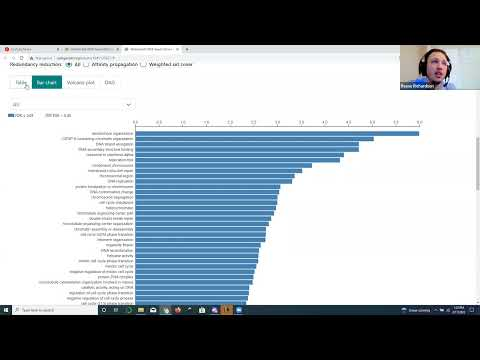

In [6]:
YouTubeVideo('kyEgahHYwhU')

Let's run WebGestalt ORA on the set of genes uniquely uregulated in EAC. We'll export each gene name to the file `up_reg_EAC_gene_symbol.txt`, where each line is one gene name. This is WebGestalt's preferred input. Our reference set will be every gene included in the differential expression comparison (i.e. every gene in `de_df`, written to the file `reference_EAC_gene_symbol.txt`). Once these files are written, head on over to [WebGestalt](http://www.webgestalt.org/)! Test for enrichment among sets in the functional database `pathway > Wikipathway cancer`.

Note that WebGestalt performs multiple hypothesis correction! This is important because we are survey many gene ontologies, and thus testing many different null hypotheses about enrichment.

In [ ]:
pd.DataFrame(de_df_slice['Gene Name'].values).to_csv('up_reg_EAC_gene_symbol.txt', header=False, index=False)
pd.DataFrame(de_df['Gene Name'].values).to_csv('reference_EAC_gene_symbol.txt', header=False, index=False)

### 3.3.2 ORA x Clustering

What if we want to know which gene sets are enriched in particular clusters after we've performed clustering on our data? Let's find out! Use the cell below to define our normalization functions, import data, normalize it, and perform clustering on our EAC dataset.

In [ ]:
def get_tmm(counts, ref_col, test_col, trim_m=0.30, trim_a=0.05):

    '''
        Calculates TMM value between ref_col and test_col
        
        counts = count matrix (pd.DataFrame)
        ref_col = reference column (str)
        test_col = test columns (str)
        trim_m = extremes to trim when taking trimmed mean of M values (float)
        trim_a = extremes to trim when taking trimmed mean of M values (float)
        
    '''

    if ref_col == test_col:
        counts_slim = counts[(counts[ref_col].values > 0) & (counts[test_col].values > 0)][[ref_col]]
    else:
        counts_slim = counts[(counts[ref_col].values > 0) & (counts[test_col].values > 0)][[ref_col, test_col]]

    n_k = counts_slim[test_col].sum()
    n_r = counts_slim[ref_col].sum()

    m_k = np.log2(counts_slim[test_col].values/n_k)-np.log2(counts_slim[ref_col].values/n_r)
    a_k = 0.5*np.log2((counts_slim[test_col].values/n_k)*(counts_slim[ref_col].values/n_r))
    w_k = (n_k - counts_slim[test_col].values)/(n_k*counts_slim[test_col].values) + (n_r - counts_slim[ref_col].values)/(n_r*counts_slim[ref_col].values)

    trim_array_m = (m_k <= np.percentile(m_k, 100*(1-(trim_m/2)))) & ((m_k >= np.percentile(m_k, 100*((trim_m/2)))))
    trim_array_a = (a_k <= np.percentile(a_k, 100*(1-(trim_a/2)))) & ((a_k >= np.percentile(a_k, 100*((trim_a/2)))))

    m_k = m_k[trim_array_m & trim_array_a]
    a_k = a_k[trim_array_m & trim_array_a]
    w_k = w_k[trim_array_m & trim_array_a]
    tmm_k = 2**(np.sum(w_k*m_k)/np.sum(w_k))
    return tmm_k

def get_m_a(counts, ref_col, test_col, trim_m=0.30, trim_a=0.05):

    '''
        Calculates TMM value between ref_col and test_col
        
        counts = count matrix (pd.DataFrame)
        ref_col = reference column (str)
        test_col = test columns (str)
        trim_m = extremes to trim when taking trimmed mean of M values (float)
        trim_a = extremes to trim when taking trimmed mean of M values (float)
        
    '''

    if ref_col == test_col:
        counts_slim = counts[(counts[ref_col].values > 0) & (counts[test_col].values > 0)][[ref_col]].copy()
    else:
        counts_slim = counts[(counts[ref_col].values > 0) & (counts[test_col].values > 0)][[ref_col, test_col]]

    n_k = 1 #counts_slim[test_col].sum()
    n_r = 1 #counts_slim[ref_col].sum()

    m_k = np.log2(counts_slim[test_col].values/n_k)-np.log2(counts_slim[ref_col].values/n_r)
    a_k = 0.5*np.log2((counts_slim[test_col].values/n_k)*(counts_slim[ref_col].values/n_r))
    return m_k, a_k

def norm_tmm(counts, columns_to_norm, ref_col=None):
    '''
        Normalizes count matrix by TMM.
        
        counts = count matrix (pd.DataFrame)
        ref_col = reference column (str)
        columns_to_norm = columns to be normed (str)
        
    '''
    if ref_col == None:
        ref_col = columns_to_norm[0]
    counts[counts.columns[~counts.columns.isin(cols_to_norm)]]
        
    tmm_array = []
    for col in columns_to_norm:
        tmm_array.append(get_tmm(counts = counts, ref_col=ref_col, test_col=col))
    tmm_array = np.array(tmm_array)
    #print(tmm_array)

    norm_counts = counts[columns_to_norm]/(np.sqrt(tmm_array)*counts[columns_to_norm].sum(axis=0))
    norm_counts[counts.columns[~counts.columns.isin(columns_to_norm)]] = counts[counts.columns[~counts.columns.isin(columns_to_norm)]]
    return norm_counts

counts = pd.read_csv('E-MTAB-4054-raw-counts.tsv', sep='\t')
design = pd.read_csv('E-MTAB-4054-experiment-design.tsv', sep='\t')
design = design[design['Analysed'] == 'Yes'].reset_index(drop=True)

design['labels'] = ['']*len(design)

design['labels'].loc[(design[['Factor Value[disease]', 'Factor Value[disease staging]']].values == ["Barrett's esophagus", "non-dysplastic"]).all(axis=1)] = 'NDBE'
design['labels'].loc[(design[['Factor Value[disease]', 'Factor Value[disease staging]']].values == ["Barrett's esophagus", "low-grade dysplasia"]).all(axis=1)] = 'LGD'
design['labels'].loc[(design['Factor Value[disease]'].values == "esophageal adenocarcinoma")] = 'EAC'
design['labels'].loc[(design['Factor Value[disease]'].values == "normal")] = 'NORM'

design = design.sort_values('labels')
cols_to_norm = design['Run'].values
labels = design['labels'].values

counts_norm = counts.copy()

counts_norm = norm_tmm(counts_norm, columns_to_norm=cols_to_norm, ref_col=cols_to_norm[0])

a = counts_norm[cols_to_norm].values[:,labels == 'EAC']
b = counts_norm[cols_to_norm].values[:,labels == 'LGD']
c = counts_norm[cols_to_norm].values[:,labels == 'NDBE']
d = counts_norm[cols_to_norm].values[:,labels == 'NORM']
counts_norm['ttest_p'] = scipy.stats.f_oneway(a.T, b.T, c.T, d.T).pvalue
counts_norm = counts_norm.dropna(subset=['ttest_p'])
counts_norm['bonferroni_fwer'] = counts_norm['ttest_p']*len(counts_norm['ttest_p'])
counts_norm['bonferroni_fwer'][counts_norm['bonferroni_fwer'] > 1] = 1.0
counts_norm['bh_fdr'] = counts_norm['ttest_p']*len(counts_norm['ttest_p'])/counts_norm['ttest_p'].rank()
counts_norm['bh_fdr'][counts_norm['bh_fdr'] > 1] = 1.0

counts_norm_slim = counts_norm[counts_norm['bonferroni_fwer'] < 0.05]
counts_norm_slim = counts_norm_slim.set_index('Gene Name')[cols_to_norm]
counts_norm_slim.columns = labels

# Define colors to label our columns to make the diagnosis categories of our clustermap easier to read
lut = dict(zip(set(labels), ['k', 'r', 'g', 'b'])) # black, red, green, blue
col_colors = pd.DataFrame(labels)[0].map(lut)

g = sns.clustermap(counts_norm_slim, # data to cluster
                   method='ward', # method for heiarchical clustering
                   col_cluster=True, # cluster columns
                   z_score=0, # axis to perform z standardization
                   vmin=-2.5, vmax=2.5, # upper and lower limits of our colorbar
                   cmap='seismic_r', # palette to use for our colorbar
                   col_colors=[col_colors]) # what colors to label our columns on the margin

# define legend for col colors
ax = g.ax_heatmap
handles1 = [mpl.patches.Patch(facecolor=lut[name]) for name in lut]

leg1 = g.ax_row_dendrogram.legend(handles1, lut, title='diagnosis',
           bbox_to_anchor=(0.97, 0.70), bbox_transform=plt.gcf().transFigure, loc='upper left', frameon=False, fontsize=16)
plt.setp(leg1.get_title(),fontsize=16)
leg1._legend_box.align = "left"

From our gene dendrogram (i.e. the dendrogram on the y-axis), we can see that in our heirarchical organization of genes, there are three big clusters. Going from top to bottom, we'll call these clusters 0, 1, and 2. Qualitatively, it seems that Cluster 0 represents genes that are uniquely upregulated in normal esophagus (NORM), Cluster 1 represents genes that are uniquely upregulated in EAC, and Cluster 2 represents genes that are upregulared in EAC and non-malignant Barrett's esophagus. The code below applies a "tree cut" to our heirarchical clusters. This cuts the dendrogram at a point corresponding to just 3 clusters. If you were interested in the sub-clusters of these three clusters, you might apply a tree cut with 4 or more clusters (`n_clusters = 4`).

In [ ]:
df_sliced_scaled = g.data2d
Z = scipy.cluster.hierarchy.ward(df_sliced_scaled)

tree_cut = np.ndarray.flatten(scipy.cluster.hierarchy.cut_tree(Z, n_clusters=3))
tree_cut

The array `tree_cut` contains the cluster identities of each gene after the tree cut, where genes are ordered as they appear in the above clustermap. The DataFrame `df_sliced_scaled` contains the same info as `counts_norm_slim`, but Z-scaled and ordered by cluster. Notice that in this DataFrame, `Gene Name` is now the index column (`df_sliced_scaled.index`).

In [ ]:
df_sliced_scaled

The code below will print the names of genes in each cluster to their own `EAC_cluster_{cluster_id}_gene_symbol.txt` file, which you can use as input in WebGestalt. We will use all the genes in `counts_norm` as a reference set.

In [ ]:
for cluster_id in set(tree_cut):
    pd.DataFrame(df_sliced_scaled[tree_cut == cluster_id].index.values).to_csv('EAC_cluster_' + 
                                                                               str(cluster_id) + 
                                                                               '_gene_symbol.txt', 
                                                                               header=False, 
                                                                               index=False)

pd.DataFrame(counts_norm['Gene Name'].values).to_csv('EAC_cluster_reference_gene_symbol.txt', header=False, index=False)

When we run WebGestalt on these clusters (using KEGG as a functional database), we find the following gene ontologies are the most enriched for each cluster (highest enrichment ratio with FDR < 0.05).

#### Cluster 0:
1. [hsa00100: Steroid biosynthesis](https://www.kegg.jp/kegg-bin/show_pathway?hsa00100+1718+4047+50814+6307+6309+6713+7108)
2. [hsa04966: Collecting duct acid secretion](https://www.kegg.jp/kegg-bin/show_pathway?hsa04966+245973+50617+51382+523+529+9114+9296+9550)
3. [hsa04150: mTOR signaling pathway](https://www.kegg.jp/kegg-bin/show_pathway?hsa04150+11211+1975+1978+208+23175+245973+27330+3265+387+51382+51606+51719+523+529+54361+54468+55437+5563+5594+5595+5604+5605+58528+5894+6194+6199+6249+64121+7474+7477+7482+7483+80326+81029+8140+81617+8323+8649+89780+9296+9550)

#### Cluster 1:
1. [hsa03030: DNA replication](https://www.kegg.jp/kegg-bin/show_pathway?hsa03030+1763+2237+23649+4173+4175+5111+5422+5426+5427+5557+5558+5983+5984+79621)
2. [hsa03440: Homologous recombination](https://www.kegg.jp/kegg-bin/show_pathway?hsa03440+11073+146956+25788+472+51720+580+5889+5892+641+675+7516+79728+83990+8438)
3. [hsa05150: Staphylococcus aureus infection](https://www.kegg.jp/kegg-bin/show_pathway?hsa05150+2204+2209+2212+2214+2215+2357+2358+2359+3383+3684+629+6404+712+713+717+719+728)

#### Cluster 2:
1. [hsa00604: Glycosphingolipid biosynthesis](https://www.kegg.jp/kegg-bin/show_pathway?hsa00604+27090+2720+3074+6483+8869+9197)
2. [hsa00511: Other glycan degradation](https://www.kegg.jp/kegg-bin/show_pathway?hsa00511+23324+2517+2519+2720+3074+4126+57704)
3. [hsa00531: Glycosaminoglycan degradation](https://www.kegg.jp/kegg-bin/show_pathway?hsa00531+2720+2799+2990+3074+3373+4669+60495)

You can view the results of each of these instances of ORA in the archives `cluster_{cluster_id}_webGestalt_results.zip` contained in this folder.

Note that WebGestalt will limit the size of our reference set to just genes that appear in our input reference set *and are annotated in at least one KEGG gene ontology*. This ensures that unnannotated genes don't contaminate our results (although unnanotated does not necessarily mean that the gene has no function, just that your functional database of choice hasn't annotated it to a function for one reason or another.

# Congratulations!
## You have completed this lesson on over-representation analysis!

To practice the skills you've acquired thus far, complete the excercises below.

#### Exercise 3.1

You enter a meeting of the Fencing Club at Northwestern and find that of the 25 undergraduates attending the meeting, 5 are biology majors and 4 are statistics majors. Let's say that Northwestern has 10,000 undergraduates, of which 1,800 are biology majors and 200 are statistics majors. Relative to Northwestern's undergraduate population and with a significance threshold of 0.05, is the Fencing Club...
1. ...significantly enriched for biology majors?
2. ...significantly enriched for statistics majors?

Provide p-values for both of your answers.

#### Exercise 3.2

Is [the surfactant metabolism pathway](https://reactome.org/PathwayBrowser/#/R-HSA-5683826) significantly enriched in the set of genes that are significantly (q < 0.05) down-regulated in the lung in COVID-19, using data from [this experiment (E-ENAD-46)](https://www.ebi.ac.uk/gxa/experiments/E-ENAD-46/Results)? Use p < 0.05 to determine if this gene set is over-represented, and use the set of all genes contained in the comparison as a reference set.

In [ ]:
# importing DE data
de_df = pd.read_csv('E-ENAD-46-query-results.tsv', sep='\t', header=3)
de_df

In [ ]:
# importing members of pathway
pathway = pd.read_csv('surfactant_metabolism_gene_set.csv', header=None)[2].apply(lambda x: x.split(' ')[1]).values
pathway

#### Exercise 3.3

Perform ORA of the genes in `top_1000.txt` using [WebGestalt](http://www.webgestalt.org/#), using `genome protein-coding` as a reference set and `geneontology > Biological Process noRedundant` as a functional database. Upload the report you obtain from hitting _Result Download_ on the results page. What are the three gene sets with the highest enrichment ratio (and FDR < 0.05)? 

For funsies: any idea what set of genes we're looking at here? No need to answer correctly, but I'd love to see if you have a guess!

#### Exercise 3.4 (worth 3 points extra credit)

At the same meeting of the Fencing Club as in Exercise 3.1, you find that 3 students are business majors. Relative to Northwestern's undergraduate population (10,000 undergraduates in total with 3,000 business majors), are business majors significantly *under-*represented in the fencing club (at a significance threshold of 0.05)? Provide a p-value.